# Katha Haldar

# a) Eigenvalues and eigenstates of an infinite 1D quantum well

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy.linalg import eigh_tridiagonal
from matplotlib import animation
warnings.filterwarnings("ignore")


### The  parameters of the grid

In [59]:
N = 2000
hbar = 1
m = 1
a =  1
x = np.linspace(0, a, N+1)[1:-1]
dx = x[1]-x[0]

### The Halmiltonian

The Halmiltonial is a tidiagonal matrix. We define the entries on the diagonal with variable **d** below. The the row below and above the diagonal is defined by **e** below. 

In [60]:
d = np.diag(-2*np.ones(N-1))
e_top = np.diag(np.ones(N-2),1)
e_low = np.diag(np.ones(N-2),-1)
M = d + e_top + e_low

In [61]:
M

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

### Hamiltonian is as follows:

In [62]:
H = (-hbar**2/(2*m)*1/(dx)**2) * M 

### Eigenvalues and Eigen vectors:

In [63]:
E,psi = np.linalg.eigh(H)

In [64]:
psi= psi.T

### Normalization:

In [65]:
def integral(f, axis=0):
    return np.sum(f*dx, axis=axis)

norms = integral(psi**2)
psi = psi/np.sqrt(norms)

### Finding the eigenvalues and eigenvectors of the Hamiltonian using scipy eigh_tridiagonal funtion:

In [66]:
def integral(f, axis=0):
    return np.sum(f*dx, axis=axis)

norms = integral(psi**2)
psi = psi/np.sqrt(norms)

### 1)b) Probability density of eigenstates

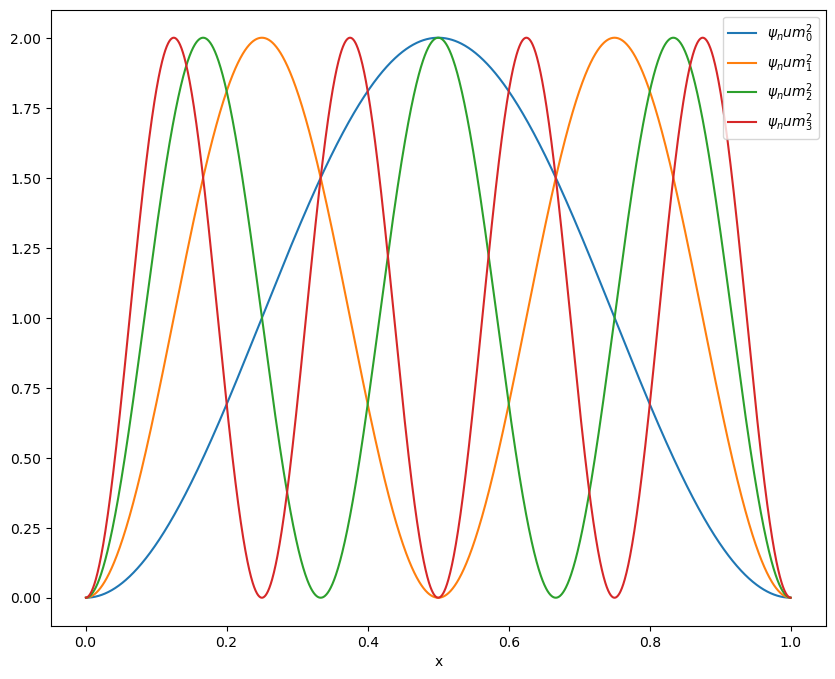

In [78]:
plt.figure(figsize= (10, 8))
for n in range(0, 4):
    plt.plot(x,psi[n]**2, label = f"$\psi_num_{n}^2$")
    plt.xlabel("x")
    plt.legend()

### 1)c) Analytical Solution

In [79]:
def psi_T(n,x):
    psi = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    return psi

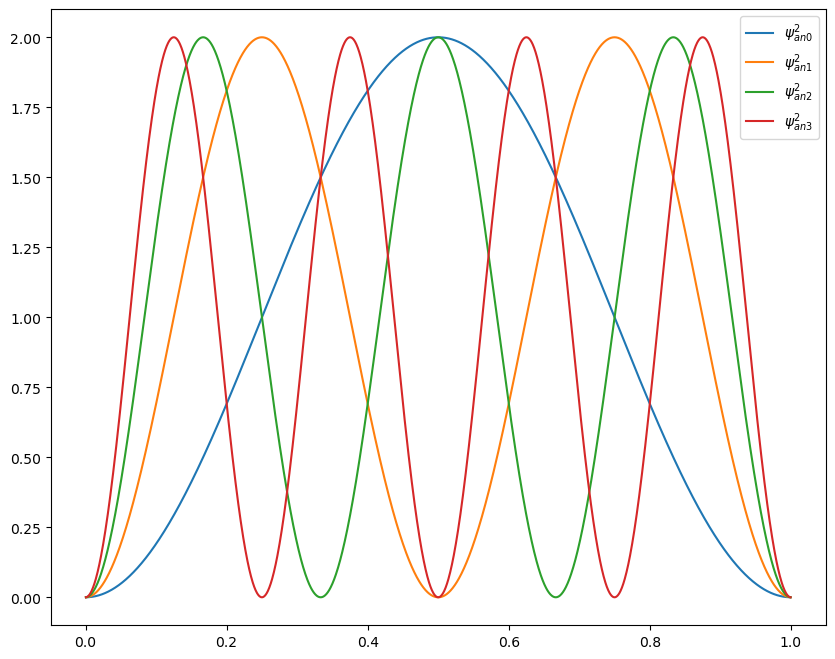

In [80]:
plt.figure(figsize=(10,8))

for n in range(1,5):
    plt.plot(x, psi_T(n,x)**2, label = f"$\psi_{{an{n-1}}}^2$")
    plt.legend()

### Compare the Energies

In [81]:
def energy(n):
    return (hbar**2*np.pi**2*n**2)/(2*m*a**2)

def relative_error(theo, obs): # Theoritical and observed errors
    return abs((theo - obs)/theo)*100

for n in range(0, 5):
    print(f"Observed Energy: {round(E[n],3)}")
    print(f"Theoritical Energy: {round(energy(n+1),3)}")
    print(f"Relative Error: {round(relative_error(energy(n+1),E[n]),3)}")
   
    
    

Observed Energy: 4.935
Theoritical Energy: 4.935
Relative Error: 0.0
Observed Energy: 19.739
Theoritical Energy: 19.739
Relative Error: 0.0
Observed Energy: 44.413
Theoritical Energy: 44.413
Relative Error: 0.0
Observed Energy: 78.957
Theoritical Energy: 78.957
Relative Error: 0.0
Observed Energy: 123.369
Theoritical Energy: 123.37
Relative Error: 0.001


## To Solve the Harmonic oscillator 

In [82]:
## Harmonic potential
def Vhar(x):
    return 1000*(x-0.5)**2

In [83]:
V2 = Vhar(x)

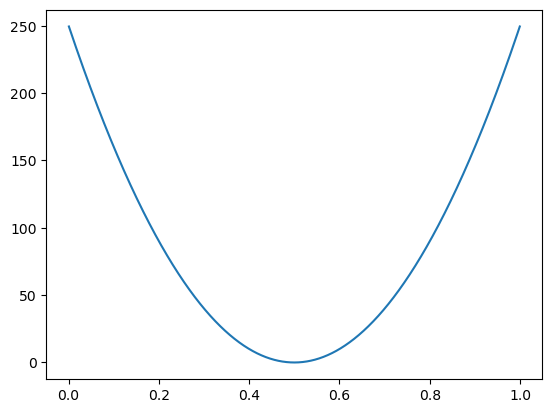

In [84]:
plt.plot(x,V2);

In [17]:
w = (-hbar**2/(2*m)*1/(dx)**2)

d2 = np.diag(-2*w*np.ones(N-1) + V2)
e_top2 = np.diag(np.ones(N-2),1)
e_low2 = np.diag(np.ones(N-2),-1)

H2 = d2 + w*( e_top2 + e_low2 )

E_h, psi_h = np.linalg.eigh(H2)
psi_h = psi_h.T

In [85]:
E_h, psi_h = np.linalg.eigh(H2)

In [86]:
psi_h = psi_h.T

In [87]:
psi_h = psi_h/np.sqrt(integral(psi_h**2))

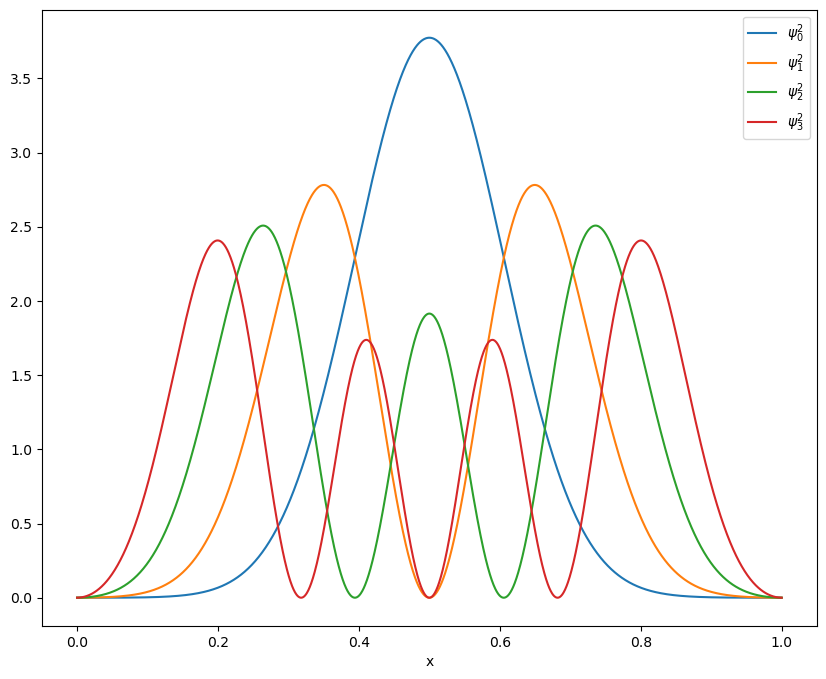

In [88]:
plt.figure(figsize= (10, 8))

for n in range(0, 4):
    plt.plot(x,psi_h[n]**2, label = f"$\psi_{n}^2$")
    plt.xlabel("x")
    plt.legend()

# Gaussian packet 

### Time dependent Schrodinger equation

Time dependent Schrodinge equation (in the position basis with infinite boundaries)

$$i\hbar\frac{\partial \psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m}\frac{\partial^2\psi(x,t)}{\partial x^2} + V\psi(x,t) = E\psi(x,t)$$   $\psi(x,0) = \psi(x,a) = 0$

## Finite difference

Discrete grid with spacing $\Delta x$ and $\Delta t$ and let $\psi_j^{m} = \psi(j\Delta x, m\Delta t), m = 1, \hbar = 1$

$$i\frac{\psi^{m+1}_{j}-\psi^m_j}{\Delta t} = -\frac{1}{2}\frac{\psi^{m}_{j+1}-2\psi^m_j +\psi^m_{j-1}}{\Delta x^2}$$

Rearranging the equation

$$\psi^{m+1}_j = \psi^m_j + \frac{i}{2}\frac{\Delta t}{\Delta x^2}(\psi^{m}_{j+1}-2\psi^m_j +\psi^m_{j-1}) -i\Delta t V(x)\psi^m_j $$

In [89]:
Nx = 301
Nt = 50_000
a = 1
x = np.linspace(0, a, Nx)
dx = x[0]-x[1]
dt = 1e-7

psi_0 = np.sqrt(2 / a) * np.sin(np.pi * x/a)
mu, sigma = 0.5, 0.05

V_g = -10000 * np.exp(-(x-mu)**2/(2*sigma**2))

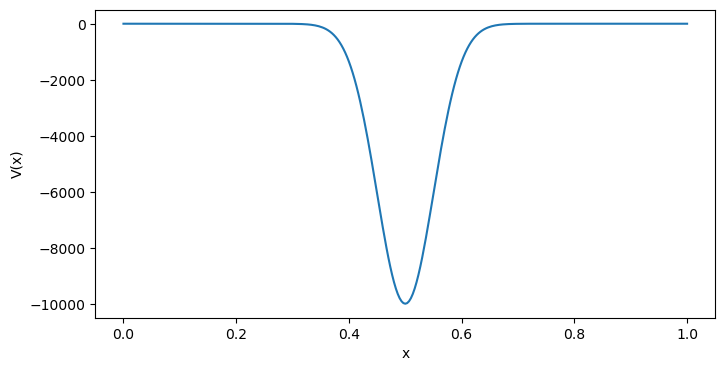

In [90]:
# Plot the potential

plt.figure(figsize=(8,4))
plt.plot(x, V_g)
plt.xlabel("x")
plt.ylabel("V(x)");

In [91]:
#Construct psi(x,t)
psi = np.zeros([Nt, Nx])
psi[0] = psi_0
print(f"psi_shape: {psi.shape}\npsi_0_Shape:{psi_0.shape}")

psi_shape: (50000, 301)
psi_0_Shape:(301,)


In [92]:
def compute_psi(psi):
    for t in range(0,Nt-1):
        for i in range(0,Nx-1):
            psi[t+1][i] = psi[t][i] + 1j * 0.5 * (dt / dx**2) * (psi[t][i+1] - 2 * psi[t][i] + psi[t][i-1]) - 1j * dt * V_g[i] * psi[t][i]
        
        norm_constant = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/norm_constant
    
    return psi    

In [93]:
psi_g = compute_psi(psi.astype(complex))

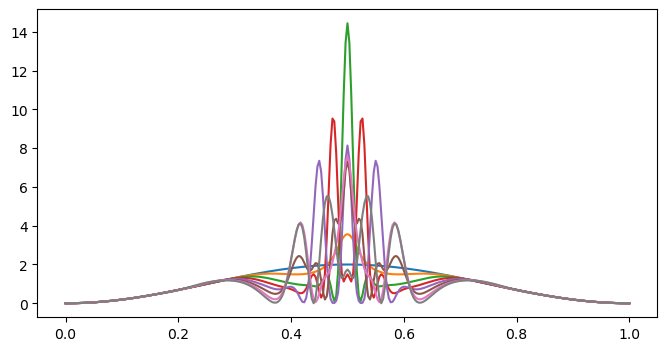

In [96]:
plt.figure(figsize=(8,4))

for i in range(0,40000, 5000):
    plt.plot(x, np.absolute(psi_g[i])**2)

# Analytical solution

In [97]:
def V_g(x):
    mu, sigma = 0.5, 0.05
    V = -10000 * np.exp(-(x-mu)**2/(2*sigma**2))
    
    return V

In [98]:
len(V_g(x))

301

In [99]:
d3 = 1/dx**2 + V_g(x)[1:-1]
e3 = -1/(2*dx**2) * np.ones(len(d3)-1)
Eg, psi_ga = eigh_tridiagonal(d3, e3)


Compute eigenstates $\psi_j$ and eigen-energies $E_j$, and use $$\psi(x,t) = \sum_{j=0}^\infty c_j \psi_j(x) e^{-i E_j t} \hspace{20mm} c_j = \int_{-\infty}^{\infty} \psi(x, 0)\psi_j^*(x) dx$$ to get the $\psi(x,t)$

In [101]:
E_j = Eg[0:70]
psi_j = np.pad(psi_ga.T[0:70], [(0, 0), (1, 1)], mode='constant')
cj = np.dot(psi_j, psi_0)
def psi_ga_func(t):
    return psi_j.T@(cj*np.exp(-1j*E_j*t))

In [102]:
Eg[0:70].shape

(70,)

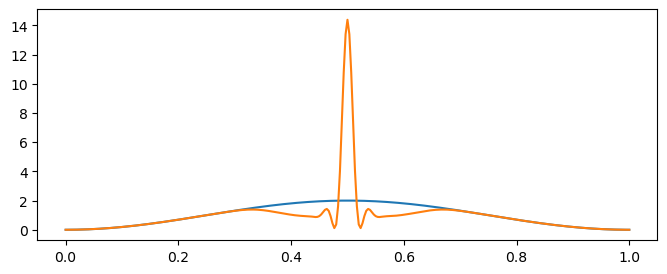

In [103]:
plt.figure(figsize=(8,3))
plt.plot(x, psi_0**2)
plt.plot(x, np.absolute(psi_ga_func(10_000*dt))**2)

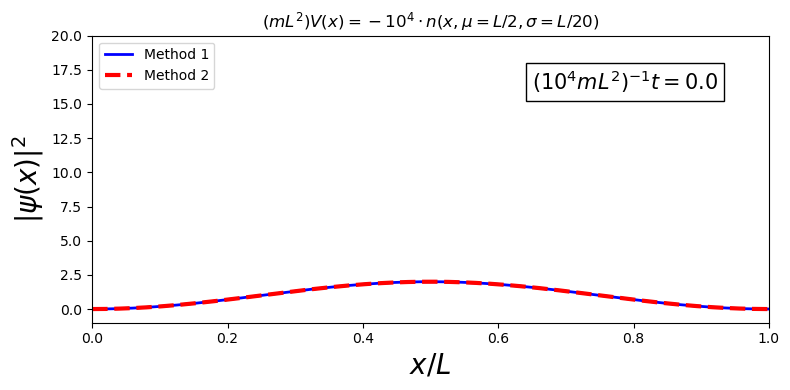

In [113]:
def animate(i):
    ln1.set_data(x, np.absolute(psi_g[80*i])**2)
    ln2.set_data(x, np.absolute(psi_ga_func(80*i*dt))**2)
    time_text.set_text('$(10^4 mL^2)^{-1}t=$'+'{:.1f}'.format(100*i*dt*1e3))
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
#ax.grid()
ln1, = plt.plot([], [], 'b-', lw=2, markersize=5, label='Method 1')
ln2, = plt.plot([], [], 'r--', lw=3, markersize=5, label='Method 2')
time_text = ax.text(0.65, 16, '', fontsize=15,
bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-1, 20)
ax.set_xlim(0,1)
ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
ax.set_xlabel('$x/L$', fontsize=20)
ax.legend(loc='upper left')
ax.set_title('$(mL^2)V(x) = -10^4 \cdot n(x, \mu=L/2, \sigma=L/20)$')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('animate.gif',writer='pillow',fps=80,dpi=100)
